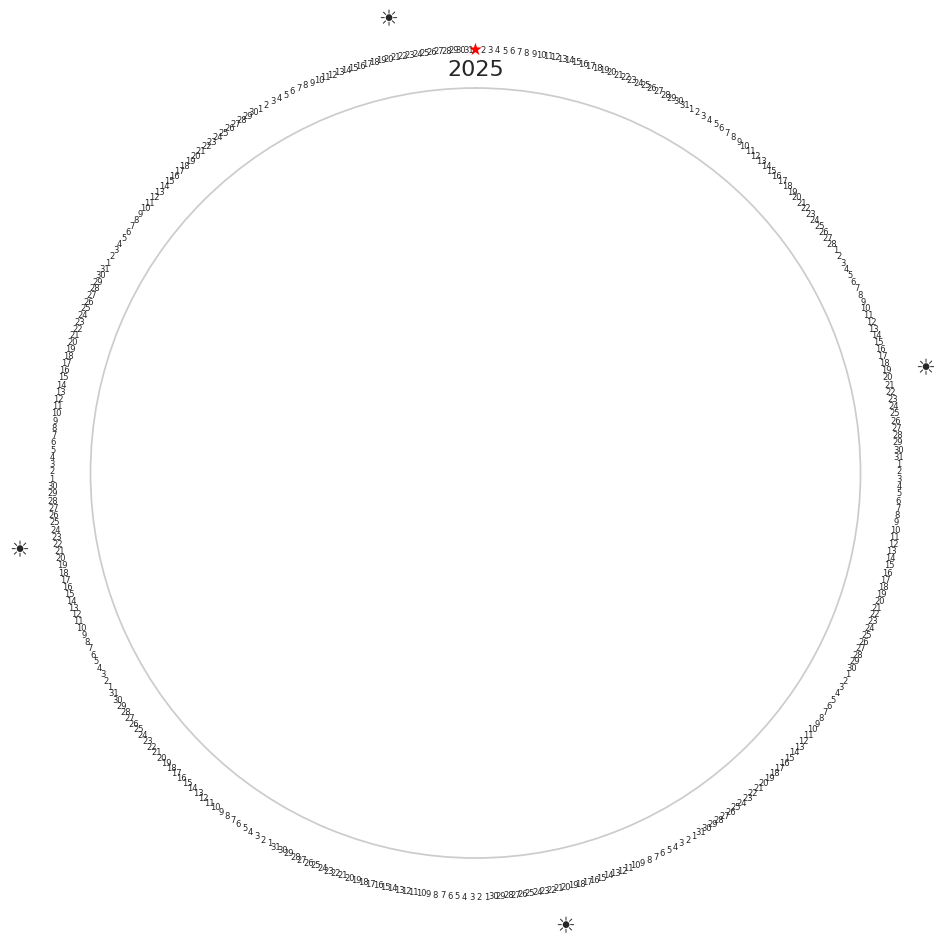

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

# Установка текущего года
current_year = datetime.now().year

# Создание данных для календаря
days_in_year = 366 if (current_year % 4 == 0 and current_year % 100 != 0) or (current_year % 400 == 0) else 365
dates = pd.date_range(start=f'{current_year}-01-01', periods=days_in_year, freq='D')
df = pd.DataFrame({
    'day': dates.day,
    'month': dates.month,
    'date': dates
})

# Создание углов для каждого дня
df['angle'] = np.linspace(0, 2 * np.pi, days_in_year, endpoint=False)

# Настройка графика
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.set_theta_direction(-1)  # Направление по часовой стрелке
ax.set_theta_offset(np.pi / 2)  # Начало сверху


# Добавление подписей дней
for i, row in df.iterrows():
    angle = row['angle']
    day = row['day']
    month = row['month']
    if day == 1 and month == 1:
        ax.text(angle, 1.1, '★', color='red', ha='center', va='center', fontsize=12)
    else:
        ax.text(angle, 1.1, str(day), ha='center', va='center', fontsize=5)

# Добавление эмодзи солнца напротив указанных дат
special_dates = {
    (3, 20): '☀️',  # 20 марта
    (6, 21): '☀️',  # 21 июня
    (9, 22): '☀️',  # 22 сентября
    (12, 21): '☀️'  # 21 декабря
}

for (month, day), emoji in special_dates.items():
    date = pd.Timestamp(year=current_year, month=month, day=day)
    idx = df[df['date'] == date].index[0]
    angle = df.loc[idx, 'angle']
    ax.text(angle, 1.2, emoji, ha='center', va='center', fontsize=16)

# Установка заголовка
ax.set_title(f'{current_year}', va='bottom', fontsize=16)

# Удаление лишних элементов
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)

# Сохранение в SVG
plt.savefig('circular_calendar.svg', format='svg')

# Показать график
plt.show()